In [16]:
import pandas as pd

path = r"C:\Users\kollmann.marek\Downloads\netflix_ratings_labeled.csv"

df = pd.read_csv(path)

df.head(10)

,MovieID,title,movie_year,decade,CustomerID,Rating,Date
0,1,Dinosaur Planet,2003.0,2000.0,1488844,3,2005-09-06
1,1,Dinosaur Planet,2003.0,2000.0,822109,5,2005-05-13
2,1,Dinosaur Planet,2003.0,2000.0,885013,4,2005-10-19
3,1,Dinosaur Planet,2003.0,2000.0,30878,4,2005-12-26
4,1,Dinosaur Planet,2003.0,2000.0,823519,3,2004-05-03
5,1,Dinosaur Planet,2003.0,2000.0,893988,3,2005-11-17
6,1,Dinosaur Planet,2003.0,2000.0,124105,4,2004-08-05
7,1,Dinosaur Planet,2003.0,2000.0,1248029,3,2004-04-22
8,1,Dinosaur Planet,2003.0,2000.0,1842128,4,2004-05-09
9,1,Dinosaur Planet,2003.0,2000.0,2238063,3,2005-05-11


In [13]:
df["Date"].min()

'1999-11-11'

In [14]:
df["Date"].max()

'2005-12-31'

In [2]:
unique_users = df['CustomerID'].nunique()
unique_movies = df['MovieID'].nunique()


In [4]:
unique_movies

17770

In [5]:
unique_users

480189

In [7]:
rating_counts = df.groupby(['MovieID', 'title']).size().reset_index(name='rating_count')

# Sort descending by count and take top 10
top_10_most_rated = rating_counts.sort_values(by='rating_count', ascending=False).head(10)

# Display the result
top_10_most_rated

,MovieID,title,rating_count
5222,5317,Miss Congeniality,232944
14844,15124,Independence Day,216596
14047,14313,The Patriot,200832
14923,15205,The Day After Tomorrow,196397
1870,1905,Pirates of the Caribbean: The Curse of the Bla...,193941
6174,6287,Pretty Woman,193295
11077,11283,Forrest Gump,181508
16067,16377,The Green Mile,181426
15937,16242,Con Air,178068
12245,12470,Twister,177556


In [10]:
# Group and calculate average rating + count
movie_ratings = df.groupby(['MovieID', 'title']).agg(
    avg_rating=('Rating', 'mean'),
    count_rating=('Rating', 'count')
).reset_index()

# Filter for movies with a minimum number of ratings (e.g., 100)
filtered = movie_ratings[movie_ratings['count_rating'] >= 100]

# Sort by average rating
top_10_highly_rated = filtered.sort_values(by='avg_rating', ascending=False).head(10)
top_10_highly_rated

,MovieID,title,avg_rating,count_rating
14686,14961,Lord of the Rings: The Return of the King: Ext...,4.723270,73335
7103,7230,The Lord of the Rings: The Fellowship of the R...,4.716611,73422
6933,7057,Lord of the Rings: The Two Towers: Extended Ed...,4.702611,74912
3391,3456,Lost: Season 1,4.670989,7249
9686,9864,Battlestar Galactica: Season 1,4.638809,1747
15247,15538,Fullmetal Alchemist,4.605021,1633
14279,14550,The Shawshank Redemption: Special Edition,4.593384,139660
12175,12398,Veronica Mars: Season 1,4.592084,1238
2977,3033,Ghost in the Shell: Stand Alone Complex: 2nd Gig,4.586364,220
7701,7833,Arrested Development: Season 2,4.582389,6621


In [17]:
list_to_slice = ["Independence Day", "The Patriot"]

df_filtered = df[df['title'].isin(list_to_slice)]
df_filtered

,MovieID,title,movie_year,decade,CustomerID,Rating,Date
60477985,11080,The Patriot,1998.0,1990.0,1943087,5,2001-10-06
60477986,11080,The Patriot,1998.0,1990.0,1907667,3,2002-02-05
60477987,11080,The Patriot,1998.0,1990.0,889439,3,2005-07-11
60477988,11080,The Patriot,1998.0,1990.0,306466,1,2001-03-29
60477989,11080,The Patriot,1998.0,1990.0,1945809,2,2001-07-13
...,...,...,...,...,...,...,...
85253611,15124,Independence Day,1996.0,1990.0,2310454,3,2005-12-25
85253612,15124,Independence Day,1996.0,1990.0,649201,4,2005-12-27
85253613,15124,Independence Day,1996.0,1990.0,2356081,4,2005-12-27
85253614,15124,Independence Day,1996.0,1990.0,2298729,4,2005-12-29


In [18]:
summary = df_filtered.groupby(["Date", "title"]).agg(
    average_rating=("Rating", "mean"),
    rating_count=("Rating", "count")
).reset_index()
summary.info()

,Date,title,average_rating,rating_count
0,1999-12-06,The Patriot,3.000000,1
1,2000-01-06,The Patriot,2.250000,4
2,2000-01-07,The Patriot,4.000000,1
3,2000-01-08,The Patriot,5.000000,1
4,2000-01-09,The Patriot,3.000000,2
...,...,...,...,...
3993,2005-12-29,The Patriot,4.044944,178
3994,2005-12-30,Independence Day,3.947761,134
3995,2005-12-30,The Patriot,3.850000,140
3996,2005-12-31,Independence Day,3.621622,74


In [20]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            3998 non-null   object 
 1   title           3998 non-null   object 
 2   average_rating  3998 non-null   float64
 3   rating_count    3998 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 125.1+ KB


In [26]:
# Pivot wider
wide = summary.pivot(index="Date", columns="title", values=["average_rating", "rating_count"])

# Flatten MultiIndex columns
wide.columns = [f"{title}_{metric}" for metric, title in wide.columns]

# Reset index so Date is a column
wide = wide.reset_index()

wide.head()


,Date,Independence Day_average_rating,The Patriot_average_rating,Independence Day_rating_count,The Patriot_rating_count
0,1999-12-06,NaN,3.00,NaN,1.0
1,2000-01-06,NaN,2.25,NaN,4.0
2,2000-01-07,NaN,4.00,NaN,1.0
3,2000-01-08,NaN,5.00,NaN,1.0
4,2000-01-09,NaN,3.00,NaN,2.0


In [27]:
wide = wide.fillna(0)

# Set Date as index
wide = wide.set_index("Date")

wide.head()


,Independence Day_average_rating,The Patriot_average_rating,Independence Day_rating_count,The Patriot_rating_count
Date,,,,
1999-12-06,0.0,3.00,0.0,1.0
2000-01-06,0.0,2.25,0.0,4.0
2000-01-07,0.0,4.00,0.0,1.0
2000-01-08,0.0,5.00,0.0,1.0
2000-01-09,0.0,3.00,0.0,2.0


<Axes: xlabel='Date'>

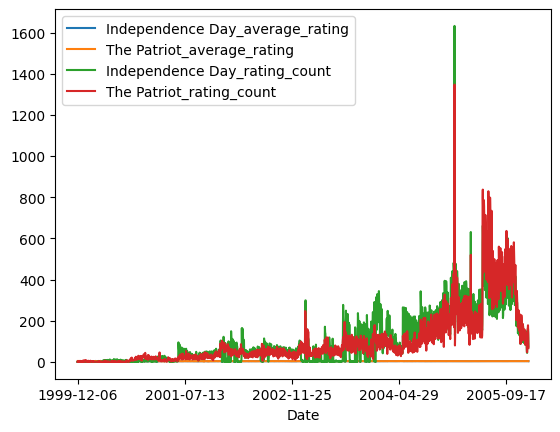

In [28]:
wide.plot()